# Project: Iris Dataset Classification

This notebook aims to compare several classification algorithms on the Iris dataset.
We will:

1.Load the data

2.Explore the data and visualize distributions

3.Apply several Machine Learning models

4.Compare their performances

Section 1: Data Loading




In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['class'] = iris.target
data['class'] = data['class'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}) # map numerical targets to names

display(data.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd


data["target_name"] = df["class"].apply(lambda x: iris.target_names[x])

data.head(), df.tail(), df


(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1                1.5               0.2   
 4                5.0               3.6                1.4               0.2   
 
    target target_name  
 0       0      setosa  
 1       0      setosa  
 2       0      setosa  
 3       0      setosa  
 4       0      setosa  ,
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 145                6.7               3.0                5.2               2.3   
 146                6.3               2.5                5.0               1.9   
 147                6.5               3.0                5.2               2.0   
 148                6.2               3

Section 2: Exploratory Data Analysis (EDA)

## Exploratory Data Analysis (EDA)

We begin by examining descriptive statistics and the distribution of the different classes.
This allows us to understand the structure of the dataset before using it for machine learning.


2.1 Descriptive statistics and dataset structure

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [ ]:
display(data.shape)

(150, 5)

In [ ]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length (cm):
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width (cm):
	 Mean = 3.06
	 Standard deviation = 0.44
	 Minimum = 2.00
	 Maximum = 4.40
petal length (cm):
	 Mean = 3.76
	 Standard deviation = 1.77
	 Minimum = 1.00
	 Maximum = 6.90
petal width (cm):
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


In [ ]:
data['class'].value_counts()

,count
class,
setosa,50
versicolor,50
virginica,50


In [ ]:
display(data.isnull().sum())

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
class,0


2.2 Covariance and Correlation


In [ ]:
# Covariance entre les features
print('Covariance:')
display(data.select_dtypes(include='number').cov())
# Corrélation normalisée entre les features
print('Correlation:')
display(data.select_dtypes(include='number').corr())

Covariance:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


Correlation:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


2.3 Distribution Visualizations


Histograms

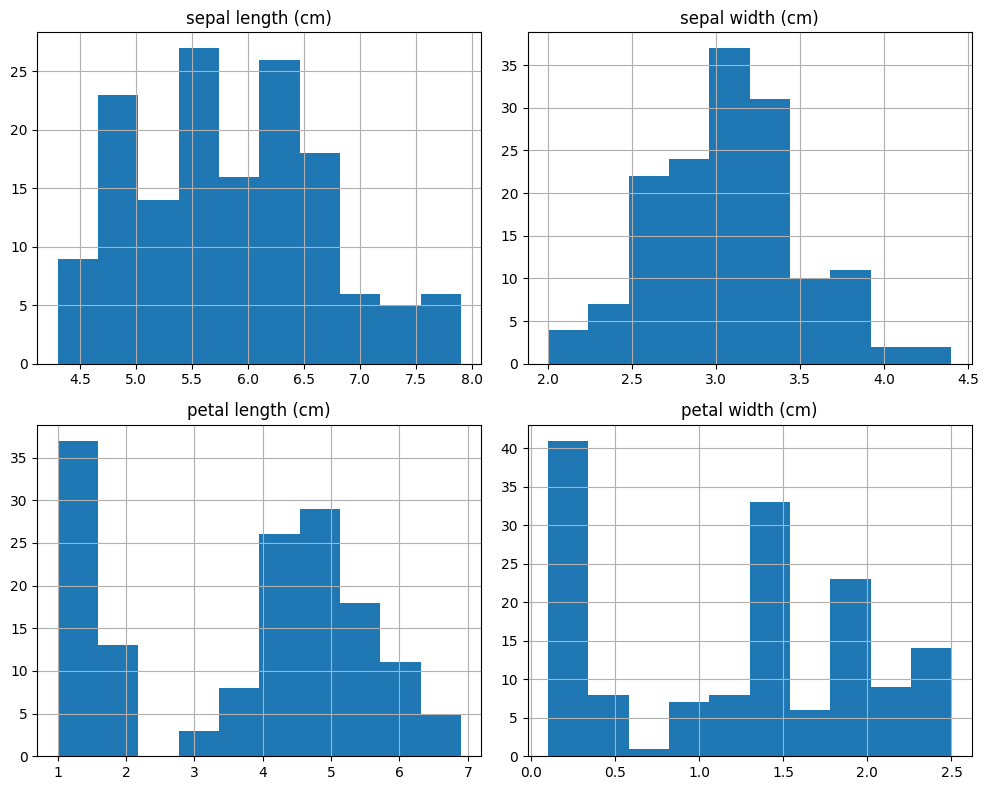

In [ ]:
import matplotlib.pyplot as plt

data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Pairplot to Observe Relationships Between Variables

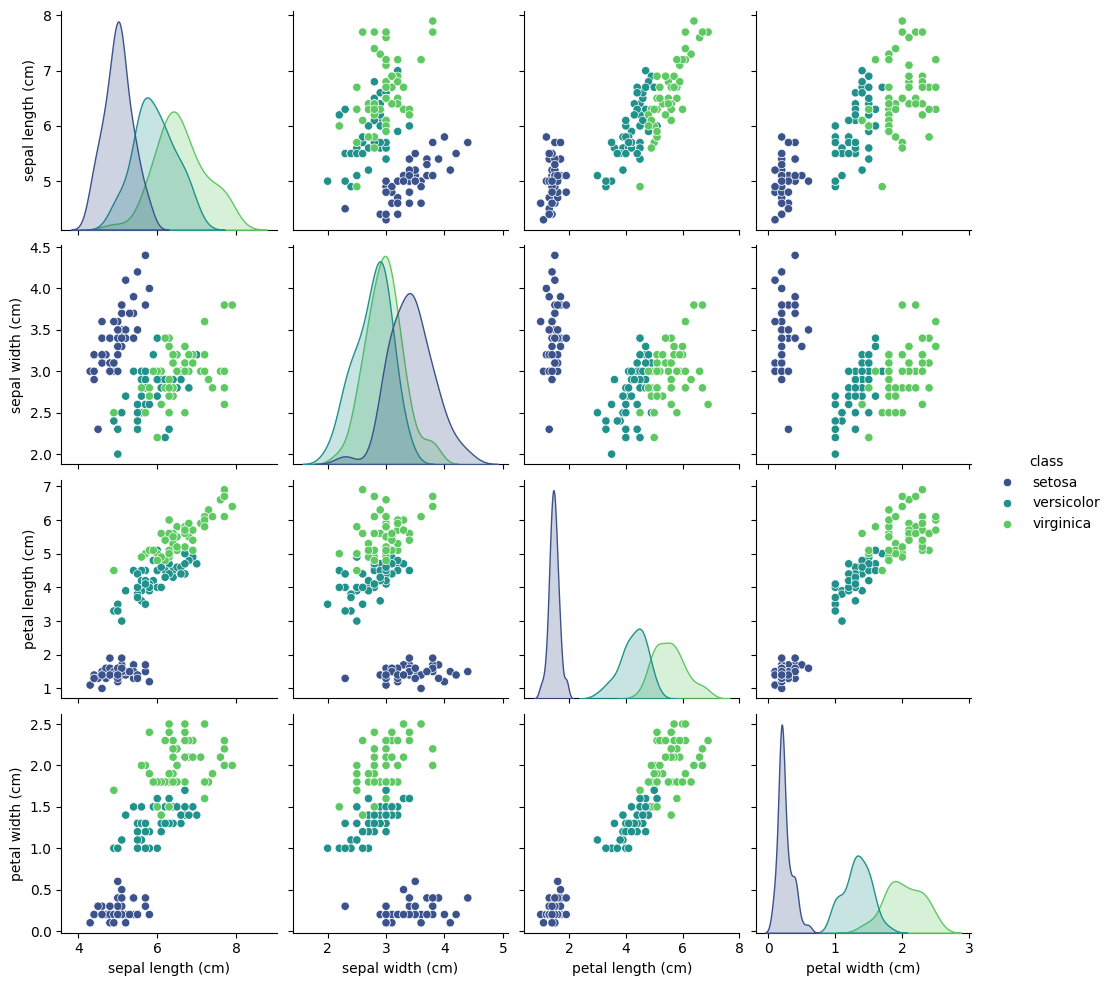

In [ ]:
import seaborn as sns

sns.pairplot(data, hue='class', palette='viridis')
plt.show()


<Axes: >

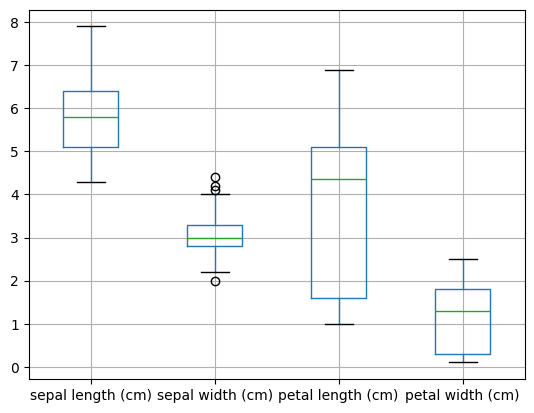

In [ ]:
data.boxplot()

Boxplots to Detect Outliers by Class

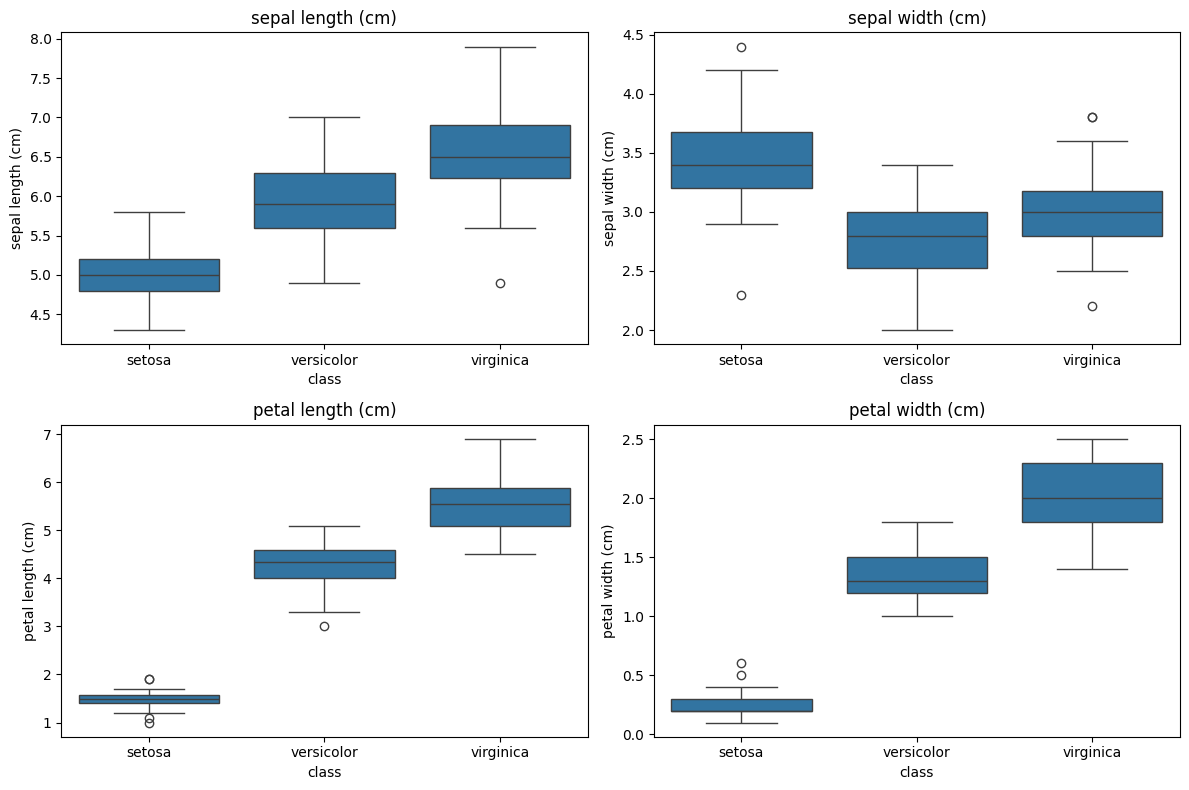

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='class', y=feature, data=data)
    plt.title(feature)
plt.tight_layout()
plt.show()

2.4 Scatter Plot Matrix

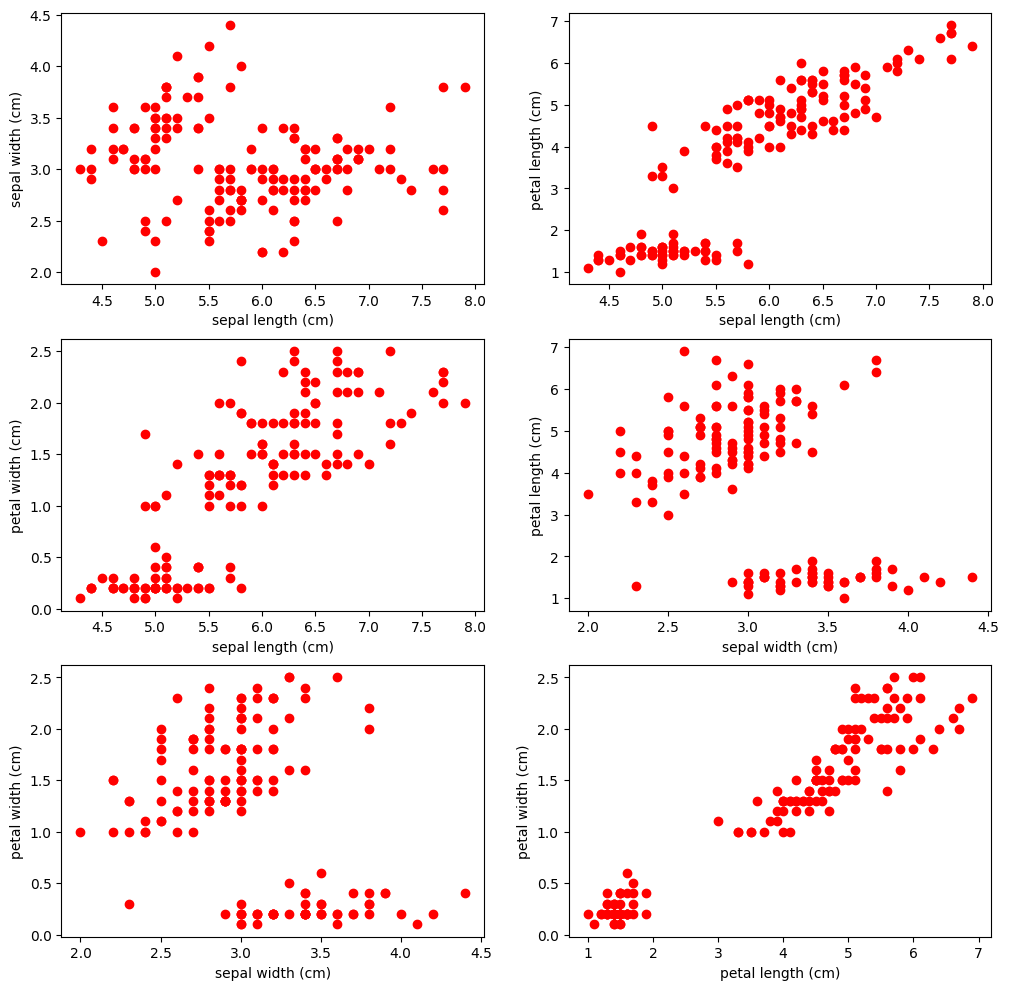

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]],
                                color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

2.5 Parallel Coordinates Plot

<Axes: >

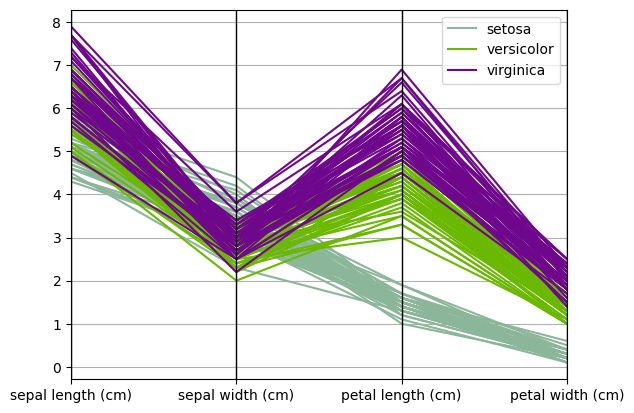

In [ ]:
from pandas.plotting import parallel_coordinates
%matplotlib inline
parallel_coordinates(data, 'class')

Section 3: Data Preparation for Learning



In [ ]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


Section 4: Machine Learning Models

4.1 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Instantiate the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



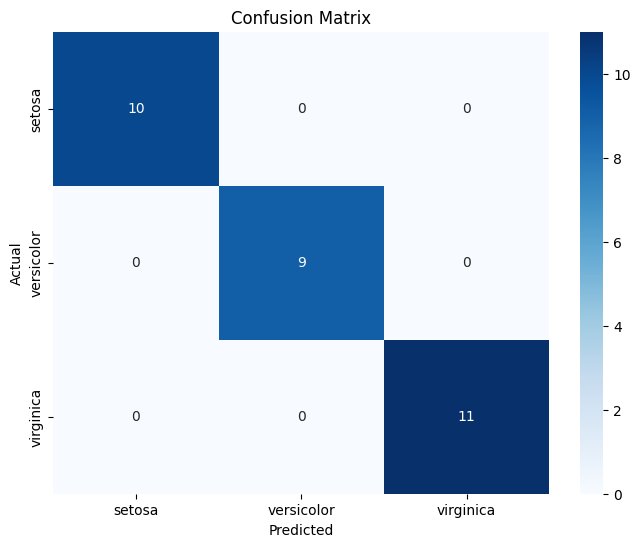

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

4.2 K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

# Display classification report and confusion matrix
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 1.00

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


KNN Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


4.3 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=200)

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

# Display classification report and confusion matrix
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.00

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Logistic Regression Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


4.4 Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model on the training data
gnb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gnb = gnb_model.predict(X_test)

print("Gaussian Naive Bayes model initialized, trained, and predictions made.")

Gaussian Naive Bayes model initialized, trained, and predictions made.


In [ ]:
print('\nGaussian Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred_gnb))

print('\nGaussian Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gnb))


Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Gaussian Naive Bayes Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


4.5 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

print("RandomForestClassifier model initialized, trained, and predictions made.")

RandomForestClassifier model initialized, trained, and predictions made.


RandomForestClassifier Accuracy: 1.00

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


RandomForestClassifier Confusion Matrix:


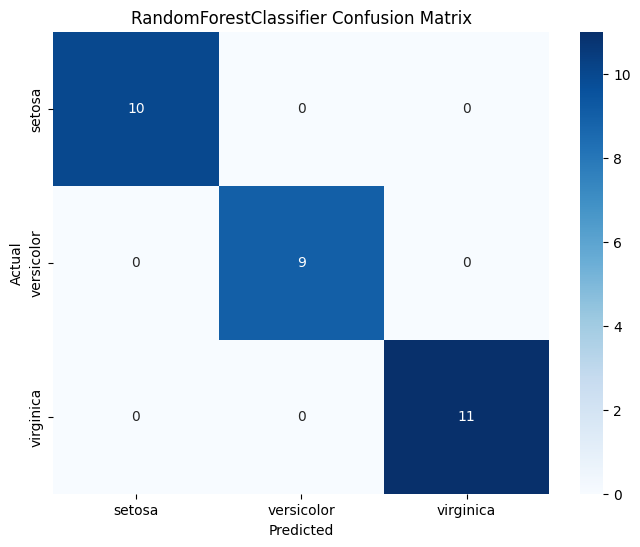

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f'RandomForestClassifier Accuracy: {accuracy_rf:.2f}')
print('\nRandomForestClassifier Classification Report:')
print(report_rf)

print('\nRandomForestClassifier Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForestClassifier Confusion Matrix')
plt.show()

4.6 Decision Tree

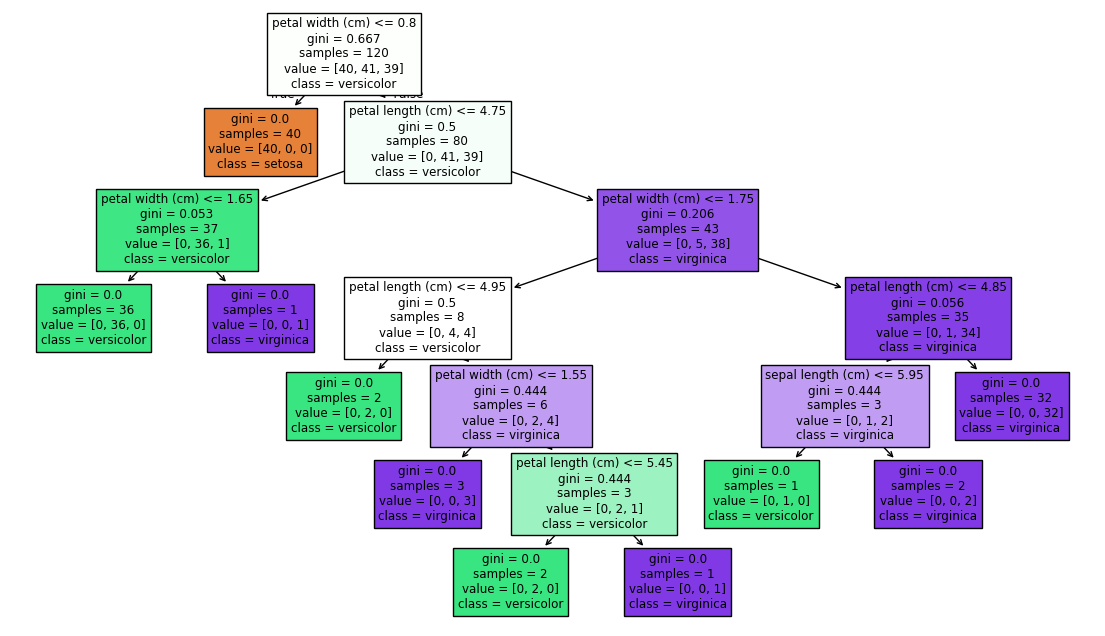

Accuracy test : 1.0


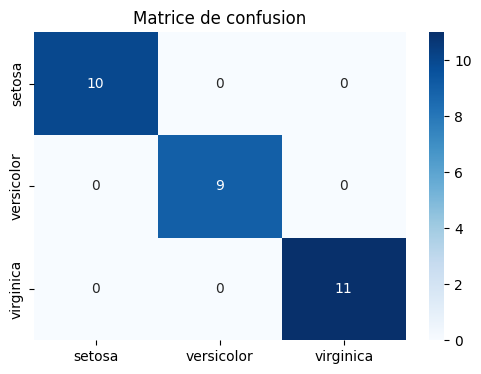

Score (max_depth=3) : 1.0


In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# 3. Entraîner l’arbre
# --------------------------------------------
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# --------------------------------------------
# 4. Visualiser l’arbre
# --------------------------------------------
plt.figure(figsize=(14, 8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# --------------------------------------------
# 5. Prédictions
# --------------------------------------------
y_pred = clf.predict(X_test)

# --------------------------------------------
# 6. Score test
# --------------------------------------------
print("Accuracy test :", accuracy_score(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Matrice de confusion")
plt.show()

# --------------------------------------------
# 7. Tester paramètres
# --------------------------------------------
clf2 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
clf2.fit(X_train, y_train)
print("Score (max_depth=3) :", clf2.score(X_test, y_test))

4.7 GridSearch for Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# 8. GridSearchCV pour max_depth et min_samples_leaf
# --------------------------------------------
param_grid = {
    "max_depth": [2, 3, 4, 5, None],
    "min_samples_leaf": [1, 2, 4, 5, 10]
}

grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score validation :", grid.best_score_)
print("Score sur test :", grid.score(X_test, y_test))

Meilleurs paramètres : {'max_depth': 3, 'min_samples_leaf': 4}
Meilleur score validation : 0.95
Score sur test : 1.0


4.8 Decision Boundary Visualization

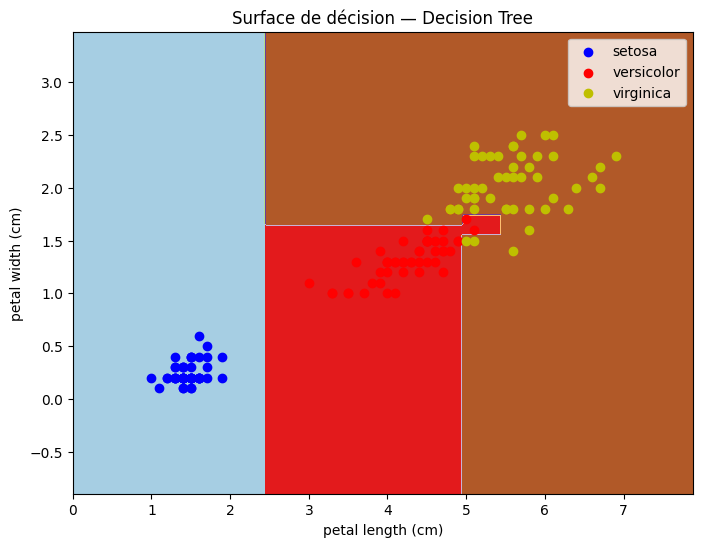

In [ ]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

# --------------------------------------------
# 10. Surface de décision
# --------------------------------------------
pair = [2, 3]  # Petal length, petal width
X2 = iris.data[:, pair]
y = iris.target

clf = tree.DecisionTreeClassifier().fit(X2, y)

x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

plot_colors = "bry"
for i, color in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X2[idx, 0], X2[idx, 1], c=color, label=iris.target_names[i])

plt.legend()
plt.title("Surface de décision — Decision Tree")
plt.show()

In [ ]:
print("Importance des features :")
print(clf.feature_importances_)


Importance des features :
[0.57167834 0.42832166]


Section 5: Model Comparison

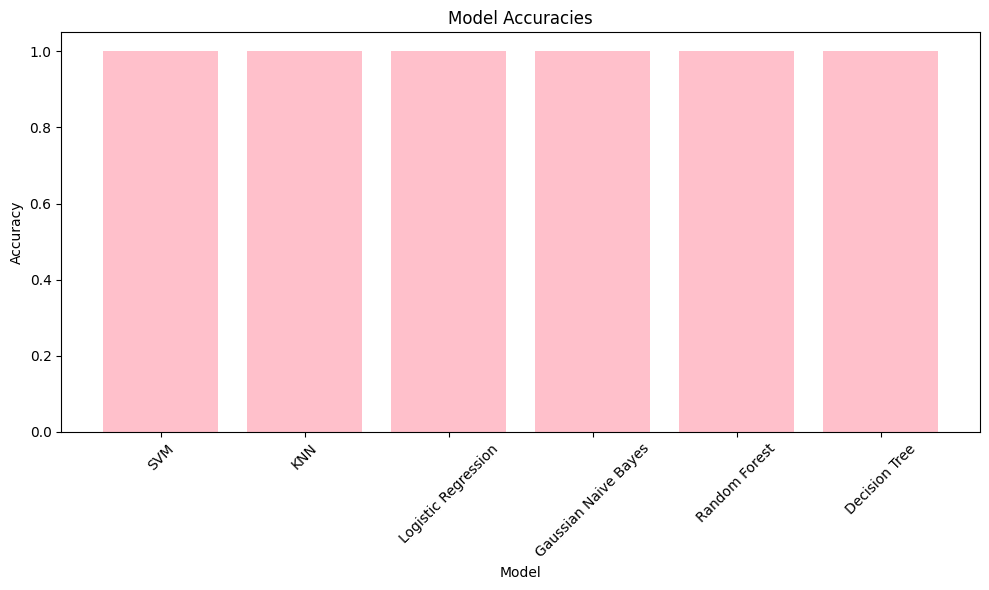

In [ ]:
from sklearn.metrics import accuracy_score

# Define the results dictionary 'res' with accuracies from all models
res = {
    'SVM': {'accuracy': accuracy},
    'KNN': {'accuracy': accuracy_knn},
    'Logistic Regression': {'accuracy': accuracy_lr},
    'Gaussian Naive Bayes': {'accuracy': accuracy_gnb},
    'Random Forest': {'accuracy': accuracy_rf},
    'Decision Tree': {'accuracy': accuracy_score(y_test, y_pred)} # y_pred from the last Decision Tree model
}

accuracies = {model_name: metrics['accuracy'] for model_name, metrics in res.items()}

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='pink')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Accuracies')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.tight_layout()  # Automatically adjust the spacing of the elements
plt.savefig("model_accuracies.png")
plt.show()